<a href="https://colab.research.google.com/github/MadisonProjects/DataScienceProjects/blob/main/FoodHubNYProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Great Learning/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
#Question 1: How many rows and columns are present within the data?
df.tail()
#There are 1898 rows (I viewed the tail and added 1 in addition to account for first entry being labeled as "0")
#There are 9 columns

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


In [ ]:
#Code to double check finding:
print("There are", df.shape[0], 'rows and', df.shape[1], 'columns.')

There are 1898 rows and 9 columns.


In [ ]:
#Question 2: What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

# Use info() to print a concise summary of the DataFrame
df.info()
#0 order_id: int64
#1 customer_id: int64
#2 restaurant_name: object
#3 cuisine_type: object
#4 cost_of_the_order: float64
#5 day_of_the_week: object
#6 rating: object
#7 food_preparation_time: int64
#8 delivery_time: int64

#int64 = integer
#object = string
#float64 = float
#dtypes: float64(1), int64(4), object(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
#I would like to convert order_id and customer_id from int64 to objects for later graphing
df['order_id'] = df.order_id.astype(object)
df['customer_id'] = df.customer_id.astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 133.6+ KB


In [ ]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
#Question 3: Are there any missing values in the data? If yes, treat them using an appropriate method.

#The ratings lacking a value have been converted to 0...no missing values now.

# Replace the not given value to 0
df['rating'] = df['rating'].replace(['Not given'],0)

df = df.astype({"rating": float, "order_id": object, "customer_id": object})

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


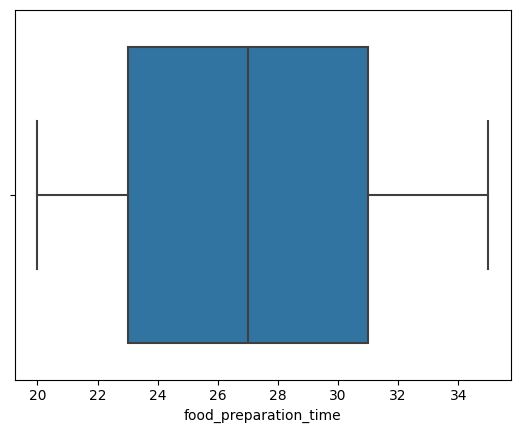

In [ ]:
#Question 4: Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

sns.boxplot(data=df, x='food_preparation_time');
# Around 20 minutes is the minimum, on average the food orders take 27.4 minutes for preparation and the maximum amount of time can be up to 35 minutes.

In [ ]:
df.food_preparation_time.mean()

27.371970495258168

In [ ]:
df.groupby(['order_id']).restaurant_name.max()

order_id
1476547                     Bareburger
1476548              Blue Ribbon Sushi
1476549               Tamarind TriBeCa
1476550                       The Loop
1476551                      The Smile
                      ...             
1478440                         Momoya
1478441                 RedFarm Hudson
1478442    Five Guys Burgers and Fries
1478443                   Cafe Mogador
1478444                    Shake Shack
Name: restaurant_name, Length: 1898, dtype: object

<Axes: xlabel='rating', ylabel='count'>

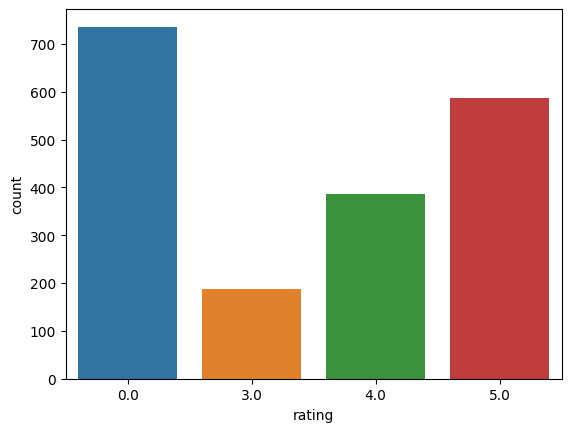

In [ ]:
#Question 5: How many orders are not rated? [1 mark]
sns.countplot(data=df, x='rating')
#Around 750 orders are not rated

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


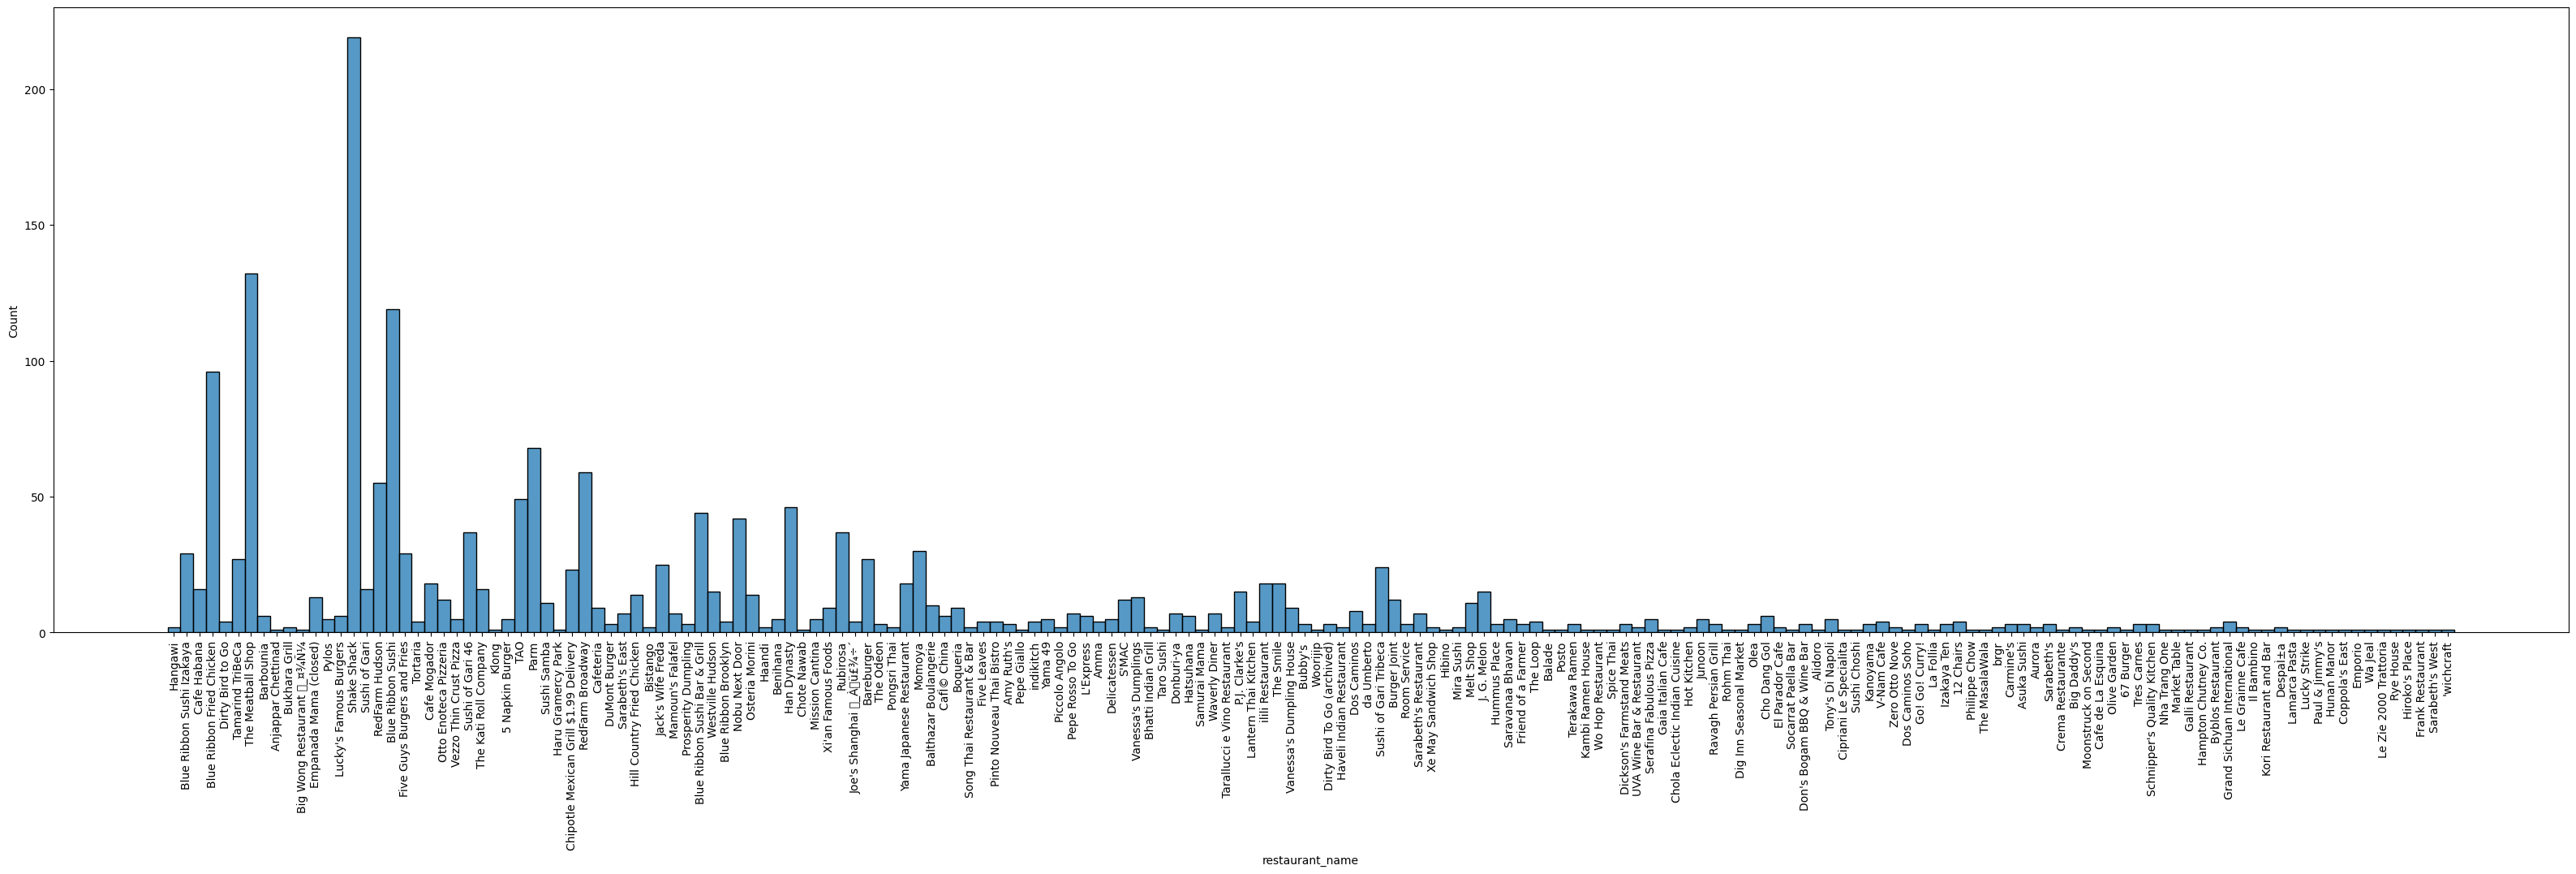

In [ ]:
#Question 6: Explore all the variables and provide observations on their distributions.
#(Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

plt.figure(figsize=(40,10))
sns.histplot(data=df, x='restaurant_name')
plt.xticks(rotation=90);

#1 Shake Shack 🍔 is the restaurant with the largest amount of orders placed BY FAR (around 225)
#2 The Meatball Shop falls into the second place option (around 125)
#3 Blue Ribbon Sushi 🍣  is third (around 110)
#4 Blue Ribbon Fried Chicken 🐔  (around 90)
#5 Parm is number five (around 57)

In [ ]:
df['restaurant_name'].mode()[0]

'Shake Shack'

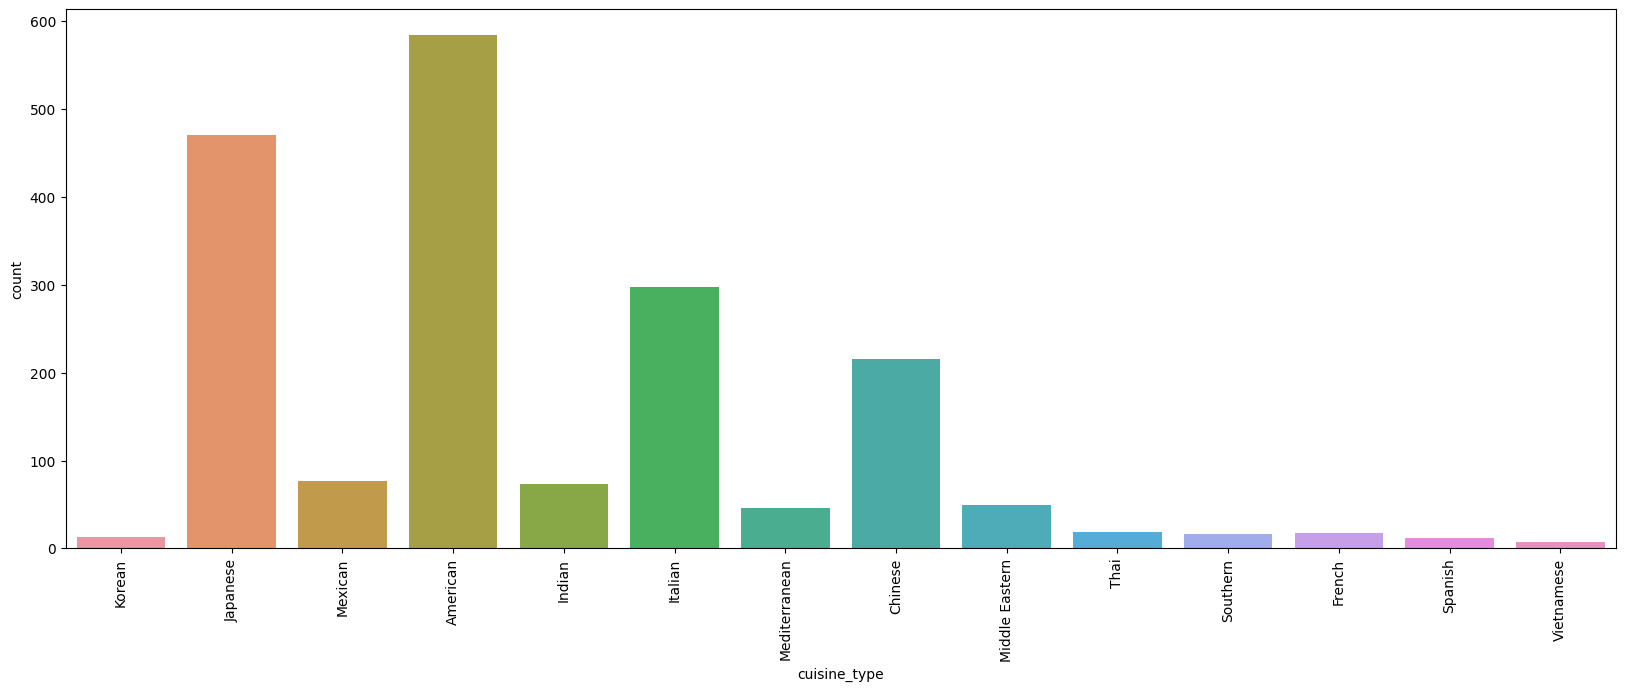

In [ ]:
#EDA (Exploratory Data Analysis: Univariate Analysis)

# Question 6: Explore all the variables and provide observations on their distributions.
#(Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#Cuisine Type
plt.figure(figsize=(20,7))
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90);
#American style cuisine is the most ordered, second is japanese.
#The least ordered cuisine is Vietnamese and Korean is the second to least ordered food type.
#ONLY four categories (American, Japanese, Italian, and Chinese) surpassed 100 orders out of the 1898 recorded orders.
#American and Japanese food combined makeup more than 50% of the food orders in total (around 1050 orders or 55.3%). (50% of food orders is approximately 949)

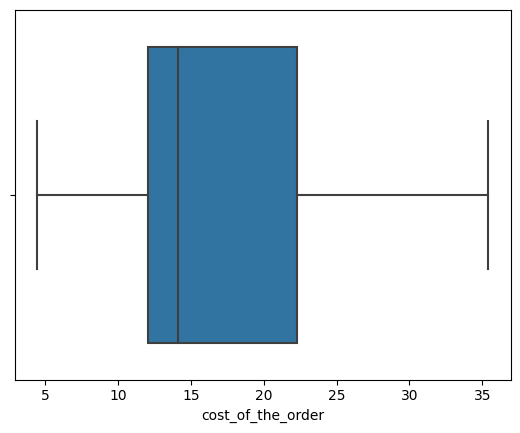

In [ ]:

#Cost of Order
sns.boxplot(data=df, x='cost_of_the_order');
# minimum cost of orders is around 4.50
# maximum cost of an order is 35$
# median cost of an order is around 14$
# majority of orders cost between 12$ - 23$

<Axes: xlabel='day_of_the_week', ylabel='count'>

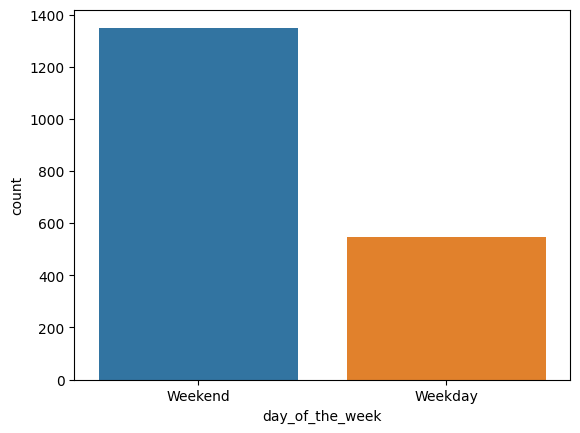

In [ ]:
#Day of Week
sns.countplot(data=df, x='day_of_the_week')
# Majority (68%) of food orders were placed during the weekend
#Potentially a trend! Could use more data: if collected whether customer was at residential or work building may help determine if being off work vs at work makes a difference.

<Axes: xlabel='rating', ylabel='count'>

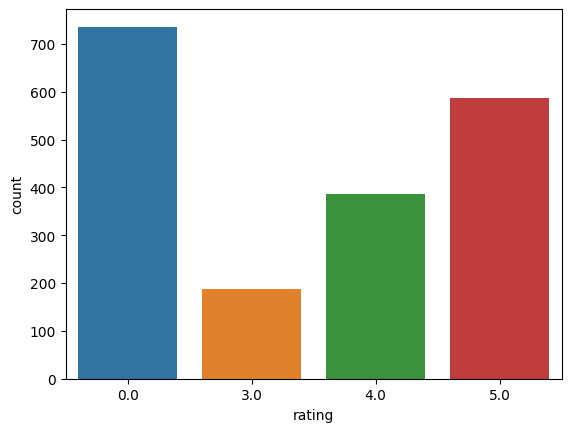

In [ ]:

#Rating
sns.countplot(data=df, x='rating')
#Majority of customers did not rate their order (around 725)
#Around 575 customers rated order 5 stars....  ⭐️ LOOP BACK TO THIS TO DETERMINE BIGGEST FACTORS

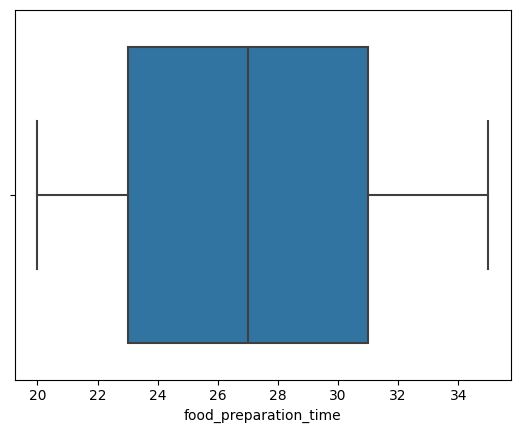

In [ ]:
sns.boxplot(data=df, x='food_preparation_time');
#On average the food preparation time was roughly 27 minutes.
#The shortest amount of time needed for prep was around 20 mins.
#The longest amount of time is around 35 minutes.
#Majority of orders took between 23 to 31 minutes.

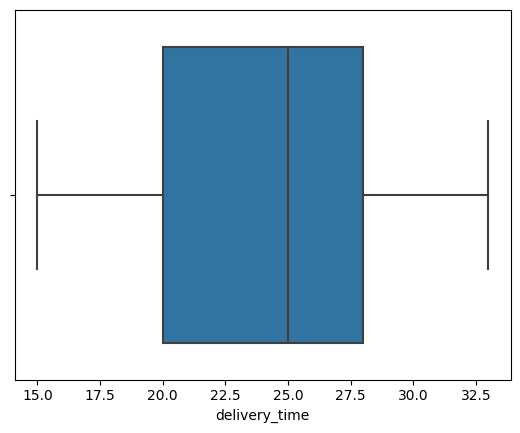

In [ ]:
sns.boxplot(data=df, x='delivery_time');
#On average delivery time is around 25 minutes
#The quickest delivery is around 15 minutes
#The slowest delivery time is around 33 minutes
#The majority of deliveries are completed within 20 to 28 minutes.

In [ ]:
df['restaurant_name'].mode()[0]

'Shake Shack'

In [ ]:
### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

df[['restaurant_name','order_id']].groupby('restaurant_name').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(5)

# On deeper analysis than my inital histogram I am able to see the exact numbers rather than estimates.
# 1. Shake Shack with 219 orders
# 2. The Meatball Shop with 132 orders
# 3. Blue Ribbon Sushi with 119 orders
# 4. Blue Ribbon Fried Chicken 96 orders
# 5. Parm 68 orders

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


In [ ]:
df.describe()

,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1898.000000,1898.000000,1898.000000,1898.000000
mean,16.498851,2.659642,27.371970,24.161749
std,7.483812,2.195280,4.632481,4.972637
min,4.470000,0.000000,20.000000,15.000000
25%,12.080000,0.000000,23.000000,20.000000
50%,14.140000,4.000000,27.000000,25.000000
75%,22.297500,5.000000,31.000000,28.000000
max,35.410000,5.000000,35.000000,33.000000


In [ ]:
### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

df[df['day_of_the_week'] =='Weekend'].groupby('cuisine_type').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(5)

#Obervation: American food is the most popular food ordered on the weekends with 415 orders

,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
cuisine_type,,,,,,,,
American,415,415,415,415,415,415,415,415
Japanese,335,335,335,335,335,335,335,335
Italian,207,207,207,207,207,207,207,207
Chinese,163,163,163,163,163,163,163,163
Mexican,53,53,53,53,53,53,53,53


In [ ]:
df[df['day_of_the_week'] =='Weekday'].groupby('cuisine_type').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(5)
#It appears the weekday's American food is still the most frequently ordered 169

,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
cuisine_type,,,,,,,,
American,169,169,169,169,169,169,169,169
Japanese,135,135,135,135,135,135,135,135
Italian,91,91,91,91,91,91,91,91
Chinese,52,52,52,52,52,52,52,52
Indian,24,24,24,24,24,24,24,24


In [ ]:
## Question 9: What percentage of the orders cost more than 20 dollars? [2 marks]

df_greater_than_20 = df[df['cost_of_the_order']>20]
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100
print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

#Observations: 29.24% of Total orders cost > than 20 dollars

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


In [ ]:
### **Question 10**: What is the mean order delivery time? [1 mark]
df['delivery_time'].mean()
#The mean delivery time is around 24 minutes

24.161749209694417

In [ ]:
### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers.
#Find the IDs of these customers and the number of orders they placed. [1 mark]

df[['order_id','customer_id']].groupby('customer_id').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(10)

#Observations:
# Having determined the top 10 most frequent customers, we determine that there is a tie between four clients with the 5th highest order count (7).
#The company may have to use the total amount spent by these customers ,or some other parameter,
#to be a tie-breaker or make a decision on how to address the multiple customers with the same qualifying score. Otherwise they should reward 8 customers instead of 5.

NameError: ignored

<ipython-input-59-fd43d6e4c84d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)


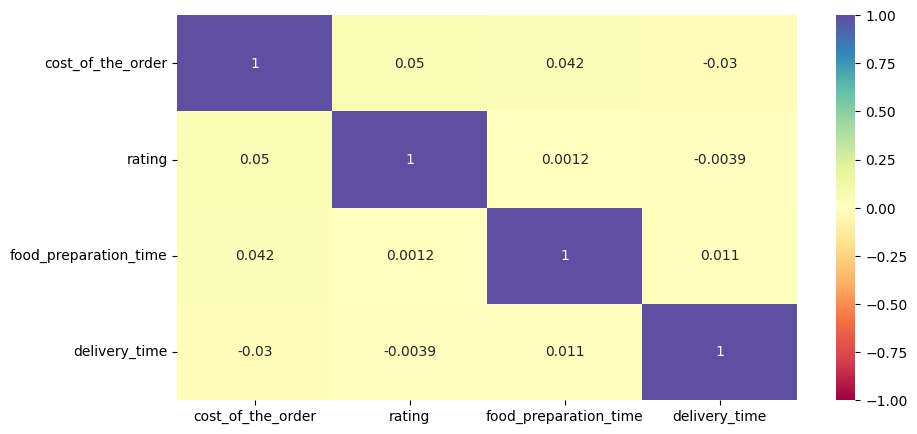

In [ ]:
### Question 12: Perform a multivariate analysis to explore relationships between the important variables in the dataset.
# (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]¶

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

#The heatmap shows weak correlation between the variables.

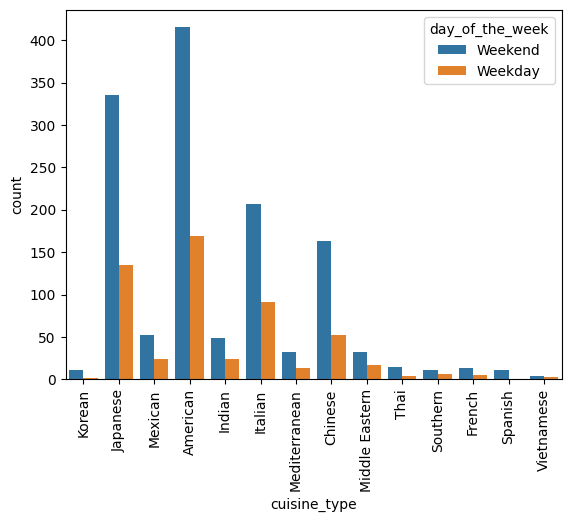

In [ ]:
sns.countplot(data=df,x='cuisine_type',hue= 'day_of_the_week')
plt.xticks(rotation=90)
plt.show()

#Observations on Orders per cuisine per day of the week:

#We note that the pattern of popularity of cuisine folllow the same pattern irrespective of the day of the week.
#However the demand altogether from this sample is lower during the weekdays

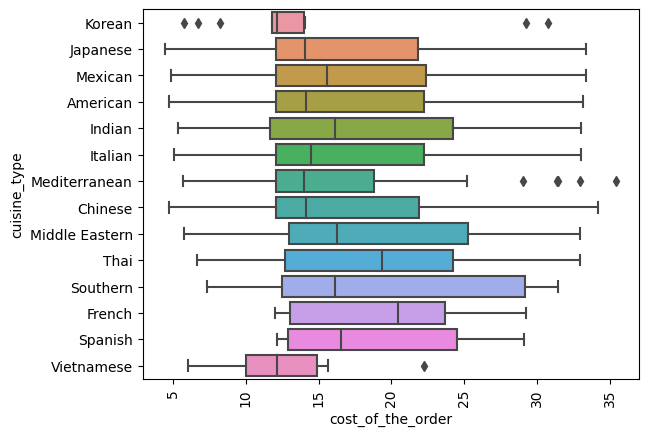

In [ ]:
sns.boxplot(data=df,x='cost_of_the_order',y='cuisine_type')
plt.xticks(rotation=90)
plt.show();

#Observations on Spread Cost of Order:

#Most cuisines have a large variance in costs loosely between 13$ to 23$ with a few having outliers such as Korean, Mediterranean and Vietnamese

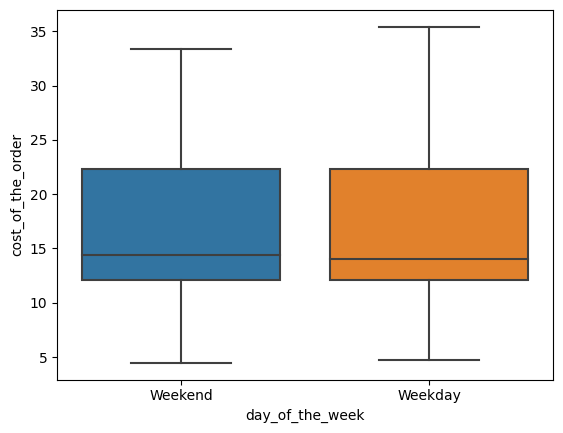

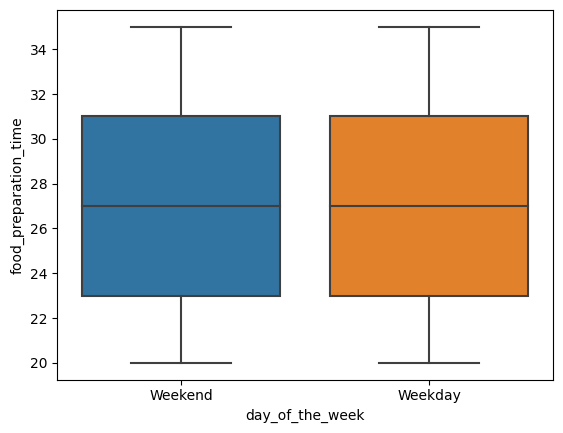

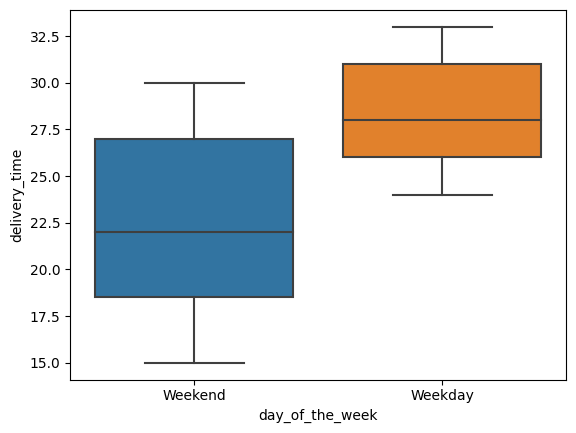

In [ ]:
sns.boxplot(data=df,x='day_of_the_week',y='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time')
plt.show()

#Observations on Day of the week against the other variables:

#We note a nearly identical spread of observations irrespective of the day of the week
#except for delivery time which generally takes longer during the weekdays than during the weekends.
#The median delivery time for weekends is around 22.5 minutes while weekdays is about 28.5 minutes

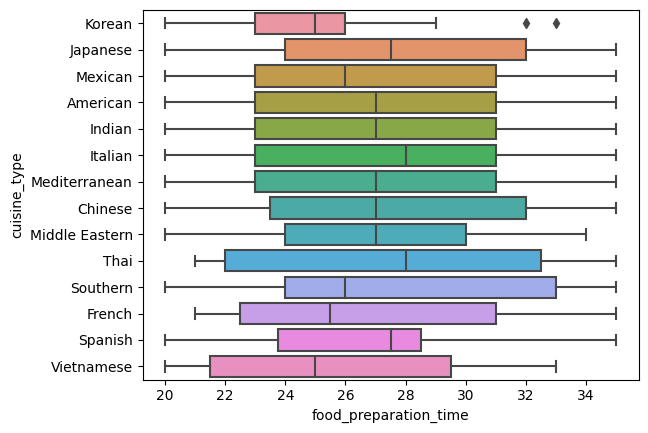

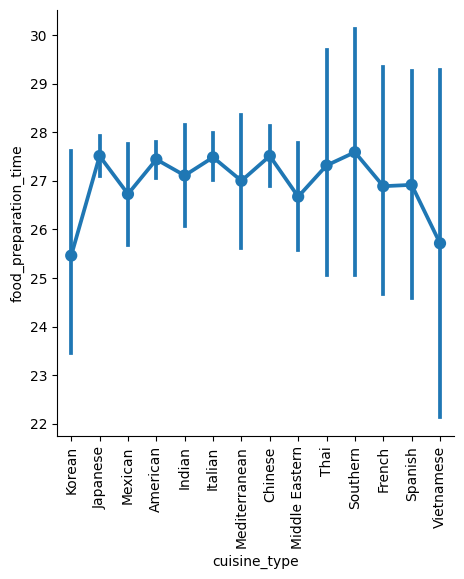

In [ ]:
sns.boxplot(data=df,x='food_preparation_time',y='cuisine_type')
plt.show()
sns.catplot(data = df, x = 'cuisine_type',y = 'food_preparation_time',kind = 'point')
plt.xticks(rotation=90)
plt.show();

#Most of the cuisin e types are prepared within a smiliar time frame
#it seems that Korean and Spanish food are prepared most often within a smaller window of variance than the rest.

In [ ]:
#Question 13: The company wants to provide a promotional offer in the advertisement of the restaurants.
#The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4.
#Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

df2 = df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').mean()> 4
df2.reset_index(inplace=True)
df3 = df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').count()> 50
df3.reset_index(inplace=True)
matching_restaurants = pd.merge(df3[df3['rating']== True], df2[df2['rating']== True],on ='restaurant_name')
matching_restaurants

#Observations: Four Restaurants qualify for the promo: Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop.

,restaurant_name,rating_x,rating_y
0,Blue Ribbon Fried Chicken,True,True
1,Blue Ribbon Sushi,True,True
2,Shake Shack,True,True
3,The Meatball Shop,True,True


In [ ]:
#Question 14: The company charges the restaurant 25% on the orders greater than 20 dollars and 15% on the orders greater than 5 dollars.
#Find the net revenue generated by the company across all orders.

revenue = 0
income = 0

cost = pd.Series(df['cost_of_the_order'])
for i in range(len(cost)):
    if (cost[i] > 5) & (cost[i] < 20):
        income = cost[i]*0.15
    elif (cost[i] > 20):
        income = cost[i]*0.25
    else:
        income = 0
    revenue = revenue + income
    print('Net revenue generated is: ',round(revenue,2),'assuming no commission charged for orders with cost below $5')

#Observations: Given the market differentiation in price, FoodHub collected a total of $ 6163.39 for the orders given

Net revenue generated is:  7.69 assuming no commission charged for orders with cost below $5
Net revenue generated is:  9.5 assuming no commission charged for orders with cost below $5
Net revenue generated is:  11.33 assuming no commission charged for orders with cost below $5
Net revenue generated is:  18.63 assuming no commission charged for orders with cost below $5
Net revenue generated is:  20.37 assuming no commission charged for orders with cost below $5
Net revenue generated is:  26.68 assuming no commission charged for orders with cost below $5
Net revenue generated is:  27.59 assuming no commission charged for orders with cost below $5
Net revenue generated is:  28.48 assuming no commission charged for orders with cost below $5
Net revenue generated is:  30.95 assuming no commission charged for orders with cost below $5
Net revenue generated is:  32.03 assuming no commission charged for orders with cost below $5
Net revenue generated is:  32.91 assuming no commission charged

In [ ]:
#Question 15: The company wants to analyze the total time required to deliver the food.
#What percentage of orders take more than 60 minutes to get delivered from the time the order is placed?
#(The food has to be prepared and then delivered.)

df['total_prep_time'] = df['food_preparation_time']+df['delivery_time']
df.head()

total_observations = df['total_prep_time'].count()
ordertime_above60 = df['total_prep_time'][df['total_prep_time']> 60].count()

percent_above60 = round((ordertime_above60/total_observations)*100,2)
percent_above60

#Observation:
#About 10.54% of orders take more than 60 minutes to prepare and deliver.

10.54

In [ ]:
#Question 16: The company wants to analyze the delivery time of the orders on weekdays and weekends.

avg_del_time = df.groupby('day_of_the_week')[['delivery_time']].agg(['mean','sum','count','std'])
avg_del_time

#Observations:
#The mean delivery time during the weekend is 22.47 minutes against the weekday delivery time of 28.34.
#This is a an interesting observation as the sample showcases an implied fewer number of orders placed on weekdays compared to weekends.
#Potential reasoning: slower traffic / more cars on the road during the weekends.

delivery_time                       
                         mean    sum count       std
day_of_the_week                                     
Weekday             28.340037  15502   547  2.891428
Weekend             22.470022  30357  1351  4.628938

Question 17: What are your conclusions from the analysis? What recommendations would you like to share to help improve the business?

Conclusion:

1. With ratings concentrated around the high score of 5, it's possible that customers only felt rating to be necessary for orders with which they recieved great satisfation. However around 1/3 of orders: (38%) were left unrated...could this showcase a trait about human nature? Potentially.

Recommendation:

1. If interesting enough Foodhub could somehow incetivize the customers genuine review on orders by providing a discount code or x amount off of their next order for anyone who participates. I believe this would lower the amount of 'Not given' order ratings and potentially skew the data even further in favor of "top restuarants". With this information FoodHub would be able to determine their bread and butter businesses and  reward the top rated restaurants by placing them on app/site as recommended food services etc. If the top restaurants are the customers first experience on the app, this will likely reflect positively on FoodHub and encourage customers to use their service again. THEN FoodHub can compare their deivery fees and additional costs with other competitors such as UberEats or Grubhub and assure that their google ads are coming up first and their cost of delivery for the five star businesses are less expensive than competitor apps to encourage funneling of new customers.

Conclusion:

2. The cost of orders peak at around 13 dollars, there is a slight peak around 25 dollars as well making the observation bimodal. Does this showcase a larger representation of two  demographics, or just coincidental?

Recommendation:

2. If allowed geotracking and/or enabling user location within the app could showcase the typical customer model of the 13 dollar customer versus the 25 dollar customer. This info will determine the next steps and further quetioning to provide a better visualisation oif custonersAre the 13 dollar customers clustered around college campuses? If so, we can drive advertising for specific five star rated business within their price range by advertising: via college sporting events / signage and billboards around their area. The same tactic for the 25 dollar customer. Are these folks more densely populated within the city near the skyscrapers and large business organizations? If so Foodhub could partner with the most frequently geo pinged company to hand out free or discounted food fliers and potentially even cut deals for mass orders done by said businesses to encourage individuals to develop a close relationship with FoodHub that they can later implement by ordering through you on their own time, off the clock.


Conclusion:

3. There is a consistent popularity structure of the cuisines irrespective of the day of the week although demand is significantly higher over the weekends. (American cuisine is the most purchased.)

Recommendation:

3. Given the consistent ranking cuisines across the days of the week, I would question whether the sample was truly random or if the findings came from a specific area of New York. If this is an evenly spread population I would suggest placing more advertisements showcasing American food on billboards / signage...but if the makeup of top cuisines is geographically influenced I would recommend a mixture of signage proming the top cuisine within each area of placemnet. I also believe better marketing can be focused on the weekday to boost sales, I would suggest the best way to do this could  be a time of day sale (such as surge pricing for busy Uber locations and times of day.) Determine the time of day most people within the area eat lunch (assumption between 11:30 - 1:00pm) output sales to random sample customers during those hours and send notifications via email / text or app. Again, use most popular restuarants as advertising content.

Conclusion:

4. Preparation time is relatively consistent as compared to delivery time, meaning delivery time is the significant variable in total preparation time (total time between order and delivery to customer).

Recommendation:

4. Determine if the GPS services and coding through FoodHub for drivers can be improved somehow? (Could alternate routes be created that would merit quicker drive times during heavy traffic hours?) As this study was composed in New York I would question how long each driver had to take to find parking…(maybe location determination on driver apps would be useful?) If drivers are spending longer times looking for parking during the weekend, would FoodHub be able to create a parking membership for businesses, where FoodHub has designated driver parking? Or would an implementation of bike / scooter drivers create quicker delivery times? Many additional questions come to mind for optimal solutions for this issue.

Conclusion:

5. There is a tie of 4 customers on the the 5th position given the reward criteria proposed. It requires further analysis or decision on how to determine the winners...BUT this demographic appears to potentially be FoodHub "super fans"


Recommendation:

5. Can FoodHub use these customers to loosely develop a demographic model of their most enthusiastic buyers? Where is their geotag, are they ordering more closely to the 13$ or 25$ mark? This information could greatly showcase WHO regularly relies on FoodHub services to place orders. This information would then also assist in determining the winners by costs of orders, but my advice would be to reward all, as they will surely spend much more if incentivized to do so.

In [ ]:
! jupyter nbconvert -- to html MadisonBuckFoodHubNYProject1.ipynb

[NbConvertApp] WARNING | pattern 'to' matched no files
[NbConvertApp] WARNING | pattern 'html' matched no files
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.9/dist-packages/jupyter_core/application.py", line 277, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.9/dist-packages/nbconvert/nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.9/dist-packages/nbconvert/nbconvertapp.py", line 585, in convert_notebooks
    raise ValueError(
ValueError: Please specify an output format with '--to <format>'.
The following formats are available: ['asciidoc', 'custom', 'html', 'latex', 'markdown', 'notebook', 'pdf', 'python', 'rst', 'script', 'slides', 'webpdf']
